# COMP 4030 / 6030 Assignment 7

**Due: Monday, 4/26/2023, before midnight.**

YOUR NAME: Matthew McMeans

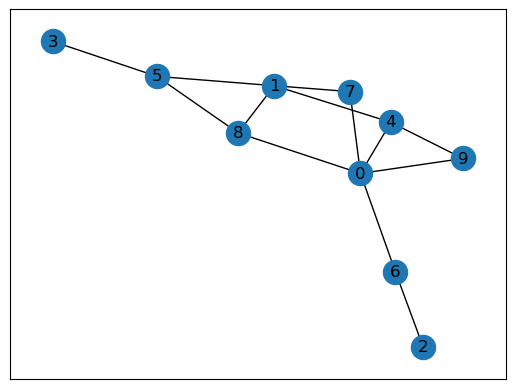

In [2]:
import networkx as nx
G = nx.gnp_random_graph(10, 0.35, seed=2023)
nx.draw_networkx(G, with_labels=True)


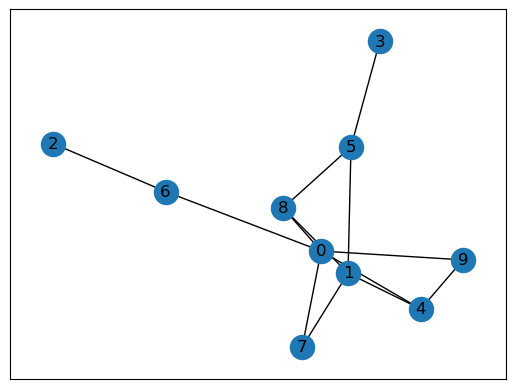

In [3]:
# A network of stations and roads, which connect stations together in some way, can be represented as a graph with nodes and edges.

# Run the code below, you see a network with 10 stations and 13 roads.

import networkx as nx
G = nx.gnp_random_graph(10, 0.35, seed=2023)
nx.draw_networkx(G, with_labels=True)


---

Each question is worth 30 points.  There're a total of 20 bonus points.

---

**Problem 1**

We are given a network of stations (nodes) and roads (edges), write a program that determines if a set of cameras placed at the stations can watch over all roads in a network. 

If a camera is placed at station (node) 0, then all the roads (edges) connected to 0 can be watched (presumably by a security guard).

In the example above, if a camera is placed at node 0, then all of these 5 roads connected to it will be watched: (0,4), (0,6), (0,7), (0,8), (0,9).

This program has inputs: a **network**, a list of **camera_placement**, which specify which stations have cameras.  For example, this list of camera_placement: [True, True, False, False, False, False, False, False, False, True] means that stations 0, 1, and 9 have cameras.

The program returns True if all roads in the network are watched, and False otherwise.

In [4]:
#
# Input: network
#        camera_placement -- a list of booleans indicating which stations have cameras.
# Output: True - if all roads in the network are watched.
#         False - if some road is not watched by any camera.
#
#
def is_valid(network, camera_placement):
    for camera1, camera2 in network.edges():
        if not camera_placement[camera1] and not camera_placement[camera2]:
            return False
    return True


In [5]:
is_valid(G, [True, True, False, False, False, False, False, False, False, True])

False

---

**Problem 2**

Use backtracking to find all camera placements, each of which can watch all roads of a network.



In [46]:
def get_nodes(solution):
    return [i for i in range(len(solution)) if solution[i]]

def generate(solution, i, possibilities, G):
    if i == len(solution):
        if is_valid(G, solution):
            print(get_nodes(solution))
    else:
        for possibility in possibilities:
            solution[i] = possibility
            generate(solution, i+1, possibilities, G)
            solution[i] = None 

def placements(G):
    nodes = len(G)
    generate([None] * nodes, 0, [True, False], G)

In [47]:
placements(G)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8]
[0, 1, 2, 3, 4, 5, 6, 7, 9]
[0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5, 6, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 8]
[0, 1, 2, 3, 4, 5, 6, 9]
[0, 1, 2, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 7, 8]
[0, 1, 2, 3, 4, 5, 7, 9]
[0, 1, 2, 3, 4, 5, 7]
[0, 1, 2, 3, 4, 5, 8, 9]
[0, 1, 2, 3, 4, 5, 8]
[0, 1, 2, 3, 4, 5, 9]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 6, 7, 8]
[0, 1, 2, 3, 4, 6, 8, 9]
[0, 1, 2, 3, 4, 6, 8]
[0, 1, 2, 3, 4, 7, 8, 9]
[0, 1, 2, 3, 4, 7, 8]
[0, 1, 2, 3, 4, 8, 9]
[0, 1, 2, 3, 4, 8]
[0, 1, 2, 3, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 5, 6, 7, 9]
[0, 1, 2, 3, 5, 6, 8, 9]
[0, 1, 2, 3, 5, 6, 9]
[0, 1, 2, 3, 5, 7, 8, 9]
[0, 1, 2, 3, 5, 7, 9]
[0, 1, 2, 3, 5, 8, 9]
[0, 1, 2, 3, 5, 9]
[0, 1, 2, 3, 6, 7, 8, 9]
[0, 1, 2, 3, 6, 8, 9]
[0, 1, 2, 3, 7, 8, 9]
[0, 1, 2, 3, 8, 9]
[0, 1, 2, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 4, 5, 6, 7, 8]
[0, 1, 2, 4, 5, 6, 7, 9]
[0, 1, 2, 4, 5, 6, 7]
[0, 1, 2, 4, 5, 6, 8, 9]
[0, 1, 2, 4

---

**Problem 3**

Suppose we want to impose the following condition: placing a camera at the station(s) that is/are connected to the most number of roads.  For example, in the network above, node 0 is connected to the most number of roads (5 of them).  We want a camera to be placed at this node/station.

Again, use backtracking to list all camera placements, each of which watches all roads, but with the additional requirement of having cameras at the most-connected node(s).

Hints:
+ Find out which nodes are most connected.
+ Modify "possibilities" to take into account this requirement.  It might need one extra parameter.
+ Use the same backtracking algorithm.

In [48]:
def get_nodes(solution):
    return [i for i in range(len(solution)) if solution[i]]

def generate(solution, i, possibilities, G, most_connected_node):
    if i == len(solution):
        if is_valid(G, solution):
            print(get_nodes(solution))
    else:
        if i == most_connected_node:
            solution[i] = True
            generate(solution, i+1, possibilities, G, most_connected_node)
        else:
            for possibility in possibilities:
                if i != most_connected_node or possibility:
                    solution[i] = possibility
                    generate(solution, i+1, possibilities, G, most_connected_node)
                    solution[i] = None

def placements(G):
    nodes = len(G)
    most_connected_node = max(range(nodes), key=lambda x: G.degree(x))
    solution = [False] * nodes
    solution[most_connected_node] = True
    generate(solution, 0, [True, False], G, most_connected_node)

In [49]:
placements(G)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8]
[0, 1, 2, 3, 4, 5, 6, 7, 9]
[0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5, 6, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 8]
[0, 1, 2, 3, 4, 5, 6, 9]
[0, 1, 2, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 7, 8]
[0, 1, 2, 3, 4, 5, 7, 9]
[0, 1, 2, 3, 4, 5, 7]
[0, 1, 2, 3, 4, 5, 8, 9]
[0, 1, 2, 3, 4, 5, 8]
[0, 1, 2, 3, 4, 5, 9]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 6, 7, 8]
[0, 1, 2, 3, 4, 6, 8, 9]
[0, 1, 2, 3, 4, 6, 8]
[0, 1, 2, 3, 4, 7, 8, 9]
[0, 1, 2, 3, 4, 7, 8]
[0, 1, 2, 3, 4, 8, 9]
[0, 1, 2, 3, 4, 8]
[0, 1, 2, 3, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 5, 6, 7, 9]
[0, 1, 2, 3, 5, 6, 8, 9]
[0, 1, 2, 3, 5, 6, 9]
[0, 1, 2, 3, 5, 7, 8, 9]
[0, 1, 2, 3, 5, 7, 9]
[0, 1, 2, 3, 5, 8, 9]
[0, 1, 2, 3, 5, 9]
[0, 1, 2, 3, 6, 7, 8, 9]
[0, 1, 2, 3, 6, 8, 9]
[0, 1, 2, 3, 7, 8, 9]
[0, 1, 2, 3, 8, 9]
[0, 1, 2, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 4, 5, 6, 7, 8]
[0, 1, 2, 4, 5, 6, 7, 9]
[0, 1, 2, 4, 5, 6, 7]
[0, 1, 2, 4, 5, 6, 8, 9]
[0, 1, 2, 4

---

**Problem 4**

Use backtracking to find a camera placements with the fewest number of cameras that can watch all roads of a network.

Hints:
+ Modify your backtracking program to carry along an "optimal placement" (one that keeps track of valid placements) and update it along the way.
+ When you update the optimal placement, make sure you duplicate the solution.  You don't want to point the optimal placement variable to the solution. You want to duplicate it.


In [50]:
def get_nodes(solution):
    return [i for i in range(len(solution)) if solution[i]]

def generate(solution, i, G, optimal_placement):
    if i == len(solution):
        if is_valid(G, solution) and (not optimal_placement or sum(solution) < sum(optimal_placement)):
            optimal_placement.clear()
            optimal_placement.extend(solution.copy())
    else:
        for possibility in possibilities(solution, i, G):
            solution[i] = possibility
            generate(solution, i + 1, G, optimal_placement)

def placements(G):
    nodes = len(G)
    optimal_placement = []
    generate([False] * nodes, 0, G, optimal_placement)
    return optimal_placement


In [51]:
placements(G)

[True, True, True, False, True, True, False, False, False, False]